# Quarto-manuscript01

Reproduction

Robert C. Cline, Sr. (Golden Triangle Land Services, Inc.)

## Quarto manuscripts: https://quarto.org/docs/manuscripts

### Slides

-   mine.quarto.pub/quarto-manuscdripts-rmed  
-   github.com/mine-cetinkaya-rundel/quarto-manuscrpts-rmed

### Manuscript:

-   mine-cetinkaya-rundel.github.io/indo-rct  
-   github.com/mine-cetinkaya-rundel/indo-rct

## Section

This is a simple placeholder for the manuscript’s main document ([Knuth 1984](#ref-knuth84)). Mine Certinkaya-Rundel presented a webinar on the steps to create a Quarto-Manuscript on March 24, 2024 ([R Consortium 2024](#ref-rconsortiumMedicineQuartoReproducible2024))[1]

## Study outcomes

``` python
# A - moderate to severe missing
plot_a <- indo_rct |> 
  count(rx, outcome) |>
  group_by(rx) |>
  mutate(p = n / sum(n)) |>
  filter(outcome == "1_yes") |>
  ungroup() |>
  mutate(
    rx = case_match(
      rx, 
      "0_placebo" ~ "Placebo",
      "1_indomethacin" ~ "Indomethacin"
    ),
    rx = fct_relevel(rx, "Placebo", "Indomethacin"),
    p = p*100
  ) |>
  ggplot(aes(x = rx, y = p, fill = rx)) +
  geom_col(color = "black") +
  scale_fill_manual(
    values = c(
      "Placebo" = "azure2", 
      "Indomethacin" =  "deepskyblue4"
    )
  ) + 
  theme_classic() +
  theme(
    legend.position = "top",
    axis.text.x = element_blank(),
    axis.ticks.x = element_blank()
  ) +
  ylim(0, 20) +
  labs(
    x = "All Post-ERCP\nPancreatitis",
    y = "Patients (%)",
    fill = NULL
  )

# renal failure missing
plot_b <- indo_rct |>
  filter(bleed == 1) |>
  mutate(
    rx = case_match(
      rx, 
      "0_placebo" ~ "Placebo",
      "1_indomethacin" ~ "Indomethacin"
      ),
    rx = fct_relevel(rx, "Placebo", "Indomethacin")
  ) |>
  count(rx, bleed) |>
  ggplot(aes(x = rx, y = n, fill = rx)) +
  geom_col(color = "black") +
  scale_fill_manual(
    values = c(
      "Placebo" = "azure2", 
      "Indomethacin" =  "deepskyblue4"
    )
  ) + 
  theme_classic() +
  theme(
    legend.position = "top",
    axis.text.x = element_blank(),
    axis.ticks.x = element_blank()
  ) +
  ylim(0, 8) +
  labs(
    x = "Gastrointestinal\nBleeding",
    y = "No. of Adverse Events",
    fill = NULL
  )

plot_a + plot_b
```

<figure id="fig-incidences-adverse-events">
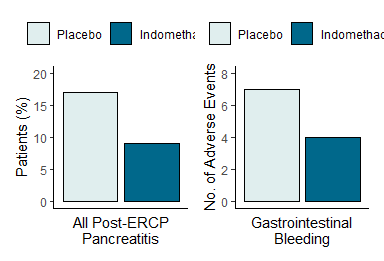
<figcaption>Figure 1: Incidence of the Primary and Secondary End Points and Adverse Events</figcaption>
</figure>

[1] C.f. YouTube presentation *https://www.youtube.com/watch?v=NK1onTLcgY4&t=1265s*

In [ ]:
library(palmerpenguins)

**This is an example of inline code**:  
The mean body mass of penguins is 4201.75 grams.  
What if we use a label (([**penguin_bodymass?**](#ref-penguin_bodymass)))

**Cross-referencing**

-   This is a cross-reference to our (<a href="#fig-incidences-adverse-events" class="quarto-xref">Figure 1</a>).  
-   You can also bring up the *cross-reference-insert-anything tool* by typing:

## Citations

In Visual mode: Insert citation or, control-shift-F8 ([Hennekens et al. 1996](#ref-hennekens1996))

This is a sample citation from a paper published in 2012 which you can find at: https://pubmed.ncbi.nlm.nih.gov/8929364/ DOI: 10.1056/NEJM199611283352207

Reference for (<a href="#fig-incidences-adverse-events" class="quarto-xref">Figure 1</a>). Citation: ([Elmunzer et al. 2012](#ref-elmunzer2012))

In [ ]:
# See 30 minutes into youtube video for discussion of embedding 
# See 36 minutes for cross referencing 
# See 38 minutes, citations  

## Quarto use binder

-   In the terminal: quarto use binder  
-   Takes a bit of time for the virtual environment being built.
-   Edit in Rstudio

**Note**: a git clone distributee merely runs *quarto render index.qmd* to generate the quarto files that were listed as .quarto/ in the .gitignore file.

## Add .github reference

**To create a .github folder** in your project directory and *set up your Quarto manuscript to reference the GitHub repository upon rendering*, you can follow these steps:

**Create the .github Folder**:

Open your project directory in your file explorer. Right-click within the directory and choose “New Folder” or create a new folder named *.github*.

**Add Necessary Files**:

1.  **publish.yml\* Inside the .github folder, create a new file named workflows (without an extension). In this workflows folder, create a YAML file with a name like ***publish.yml*\*\*. You can name it anything, but it’s common to name it after the action it performs or the tool it configures.

2.  Open the *publish.yml* file in a text editor and add the necessary configuration for your workflow. Below is an example of how you might configure it to reference your GitHub repository:

|                                                                                                                                                                                                                 |
|:----------------------------------------------------------------------|
| \` name: Quarto Render                                                                                                                                                                                          |
| on: -\> push: -\>-\> branches: -\>-\>-\> - master                                                                                                                                                               |
| jobs: -\> render: -\>-\> runs-on: ubuntu-latest -\>-\> steps: -\>-\>-\> - name: Checkout Repository -\>-\>-\> uses: actions/checkout@v2 -\>-\>-\> - name: Render Quarto Manuscript -\>-\>-\> run: quarto render |
| \`                                                                                                                                                                                                              |

## freeze in *Yaml* \_quarto.yml\*

47 minutes

execute: freeze: auto

-   freeze
    -   unless I have explicitly touched a qmd file, do not rerun the code in it
    -   *freeze: false* - means always rerun the code

## References

In [ ]:
library(knitr)
library(quarto)


quarto::quarto_render("index.qmd", output_format = "html")
# quarto::quarto_render("index.qmd", output_format = "pdf")

# cannot render plos-pdf.  See video 28 minutes. 
# quarto::quarto_render("index.qmd", output_format = "plos-pdf")

Elmunzer, B. Joseph, James M. Scheiman, Glen A. Lehman, Amitabh Chak, Patrick Mosler, Peter D. R. Higgins, Rodney A. Hayward, et al. 2012. “A Randomized Trial of Rectal Indomethacin to Prevent Post-ERCP Pancreatitis.” *New England Journal of Medicine* 366 (15): 1414–22. <https://doi.org/10.1056/nejmoa1111103>.

Hennekens, Charles H., Christine M. Albert, Susan L. Godfried, J. Michael Gaziano, and Julie E. Buring. 1996. “Adjunctive Drug Therapy of Acute Myocardial Infarction Evidence from Clinical Trials.” Edited by Alastair J. J. Wood. *New England Journal of Medicine* 335 (22): 1660–68. <https://doi.org/10.1056/nejm199611283352207>.

Knuth, Donald E. 1984. “Literate Programming.” *Comput. J.* 27 (2): 97–111. <https://doi.org/10.1093/comjnl/27.2.97>.

R Consortium. 2024. “R/Medicine: Quarto for Reproducible Medical Manuscripts.”